# Detecting SMS Spam with RNN

## 1 - About

### 1.1 - Goal/Motivation

The goal of this project is to develop and train a model that can effectively detect spam SMS messages.

### 1.2 - Task

This is a text classification task that will require a classifier model to be developed. The classifier will be trained to classify SMS messages as spam or ham (not spam).

### 1.3 - Type of Learning

This is a natural language processing (NLP) problem since the data that needs to be classified is text data in the form of SMS messages.

### 1.4 - Algorithm

The data used for this task is text data. Text data is sequential data, so a Recurrent Neural Network (RNN) is very appropriate for this task.

## 2 - Data

### 2.1 - Source

The data for this project was obtained from the University of California Irvine Machine Learning Repository. The data was collected from various sources such as Grumbletext, National University of Singapore SMS Corpus, A Corpus Linguistics Study of SMS Text Messaging by Caroline Tagg, and SMS Spam Corpus v.0.1.

Almeida, T. & Hidalgo, J. (2011). SMS Spam Collection [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5CC84.

### 2.2 - Description

The dataset contains a total of 5572 SMS messages. Out of these, 4825 messages are not spam and 747 messages are spam. On average, each message contains approximately 16 words.

## 3 - Exploratory Data Analysis (EDA)

### 3.1 - Data Inspection

In [1]:
import pandas as pd

# Load data from file into Pandas DataFrame object
data = pd.read_csv('./SMSSpamCollection', sep='\t', names=['class', 'text'])
print(data.shape)

# Show first 5 rows of the data
data.head()

(5572, 2)


,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### 3.1.1 - Sample Spam Messages

In [2]:
# Print the "text" value of the first 5 spam samples
for i in range(5):
    print(f'=== Sample {i + 1} ===')
    print(data[data['class'] == 'spam']['text'].iloc[i])
    print()

=== Sample 1 ===
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

=== Sample 2 ===
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv

=== Sample 3 ===
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

=== Sample 4 ===
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030

=== Sample 5 ===
SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info



#### 3.1.2 - Sample Ham (Not Spam) Messages

In [3]:
# Print the "text" value of the first 5 ham samples
for i in range(5):
    print(f'=== Sample {i + 1} ===')
    print(data[data['class'] == 'ham']['text'].iloc[i])
    print()

=== Sample 1 ===
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

=== Sample 2 ===
Ok lar... Joking wif u oni...

=== Sample 3 ===
U dun say so early hor... U c already then say...

=== Sample 4 ===
Nah I don't think he goes to usf, he lives around here though

=== Sample 5 ===
Even my brother is not like to speak with me. They treat me like aids patent.



### 3.2 - Data Visualization

#### 3.2.1 - Class Distribution

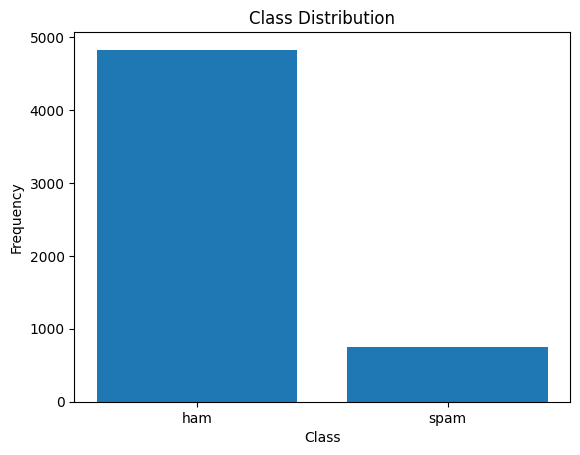

In [4]:
import matplotlib.pyplot as plt

class_counts = data['class'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution')
plt.show()

The classes are quite imbalanced. This will need to be addressed.

#### 3.2.2 - Word Count Distribution

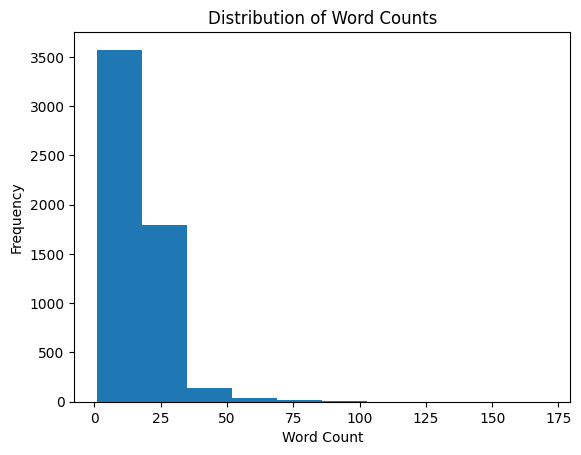

In [5]:
plt.hist(data['text'].str.split().str.len())
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.show()

The word count for most messages look to be between 0 and 35.

## 4 - Data Preprocessing

### 4.1 - Class

Since this is a binary classification problem and since the output of the model when predicting will be numeric, it makes sense to convert the class label "ham" to 0 and "spam" to 1.

In [6]:
import numpy as np

y = np.array([1 if label == 'spam' else 0 for label in data['class']])
y[:5]

array([0, 0, 1, 0, 0])

### 4.2 - Word Embedding

The Term Frequency - Inverse Document Frequency (TF-IDF) method will be used to extract the text from the messages into a feature matrix. TF-IDF calculates the importance of a word in a document based on the number of times the word appears in the document and the number of documents the word appears in from the collection of documents. The reasoning for choosing this extraction method is that it gives more weight to words that are rare across all documents but appear more frequently in one document and less weight to words that appear frequently in every document.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(ngram_range=(1,2), stop_words='english')
X = tfidf.fit_transform(data['text']).toarray()
X.shape

(5572, 37364)

## 5 - Models

### 5.1 - Model Architecture

#### 5.1.1 - Base Architecture

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

def create_base_model():
    model = Sequential([
        SimpleRNN(units=32, activation='relu', input_shape=(1, X.shape[1])),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

create_base_model().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1196704   
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,197,249
Trainable params: 1,197,249
Non-trainable params: 0
_________________________________________________________________


The model takes as input an array of size 1 x 1,196,704. The first "layer" is a simple RNN with 32 neurons. The ReLU activation function is used after this RNN layer to introduce non-linearity. This is followed by a fully connected layer of 16 neurons. The ReLU activation function is used again following this layer. A dropout layer is then used to help reduce any overfitting by dropping 20% of the neurons in the model so far. The output layer uses the Sigmoid activation function since this is a binary classification problem where the output should be between 0 and 1.

#### 5.1.2 - Long Short-Term Memory (LSTM)

In [10]:
from tensorflow.keras.layers import LSTM

def create_lstm_model():
    model = Sequential([
        LSTM(units=32, activation='relu', input_shape=(1, X.shape[1])),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

create_lstm_model().summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4786816   
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4,787,361
Trainable params: 4,787,361
Non-trainable params: 0
_________________________________________________________________


This architecture is similar to the base architecture, but the only difference being that this architecture uses an RNN with LSTM instead of a simple RNN.

#### 5.1.3 - Gated Recurrent Unit (GRU)

In [11]:
from tensorflow.keras.layers import GRU

def create_gru_model():
    model = Sequential([
        GRU(units=32, activation='relu', input_shape=(1, X.shape[1])),
        Dense(16, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

create_gru_model().summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 32)                3590208   
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3,590,753
Trainable params: 3,590,753
Non-trainable params: 0
_________________________________________________________________


This architecture is similar to the base architecture, but the only difference being that this architecture uses an RNN with GRU instead of a simple RNN.

### 5.2 - Training Methods

#### 5.2.1 - Model Hyperparameters

The model hyperameter that is changed across the models and compared is the input layer. The three models compared use a simple RNN, an RNN wth LSTM, and an RNN with GRU respectively as the first layer.

#### 5.2.2 - Training Hyperparameters

Due to limited resources in terms of computing power and time, the hyperparameters that will be considered are those involved in training a neural network.

The hyperparameters that will be tuned are:
- Number of epochs
- Batch size

## 6 - Results and Analysis

### 6.1 - Hyperparameter Tuning

#### 6.1.1 - Procedure

The hyperparameter tuning procedure will consider 10 and 20 as values for the number of epochs and 64, 128, and 256 as values for the batch size. Each combination of hyperparameters will be used to train the model and the best validation accuracy, the hyperparameters used to achieve that accuracy, and the model trained on those hyperparameters will be stored.

#### 6.1.2 - Base Architecture Hyperparameter Tuning

To address the class imbalance, the `stratify=y` argument will be passed to the `train_test_split` function to maintain the same proportion of class labels from the original dataset in the training and validation sets.

In [24]:
from sklearn.model_selection import train_test_split

# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

# Reshape the input to match RNN input requirements
X_train = np.expand_dims(X_train, axis=1)
X_val = np.expand_dims(X_val, axis=1)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

# Hyperparameters and values considered
num_epochs = [10, 20]
batch_sizes = [64, 128, 256]

# Returns best # of epochs, batch size, validation accuracy, and model
def tune_hyperparameters(create_model):
    val_accs = {}
    best_val_acc = 0
    best_h_params = { 'num_epochs': None, 'batch_size': None }
    best_hp_model = None
    
    for epochs in num_epochs:
        val_accs[epochs] = {}
        for batch_size in batch_sizes:
            print(f'# of epochs: {epochs}, batch size: {batch_size}')
            model = create_model()
            early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)
            history = model.fit(
                X_train, y_train,
                validation_data=(X_val, y_val),
                epochs=epochs,
                batch_size=batch_size,
                callbacks=[early_stopping],
                verbose=0
            )
            val_acc = max(history.history['val_accuracy'])
            print(f'Validation accuracy: {val_acc}')
            val_accs[epochs][batch_size] = val_acc
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                best_h_params['num_epochs'] = epochs
                best_h_params['batch_size'] = batch_size
                best_hp_model = model
                
    return val_accs, best_val_acc, best_h_params, best_hp_model

In [26]:
base_val_accs, base_best_val_acc, base_best_h_params, base_best_hp_model = tune_hyperparameters(create_base_model)

# of epochs: 10, batch size: 64
Validation accuracy: 0.9856502413749695
# of epochs: 10, batch size: 128
Validation accuracy: 0.9838564991950989
# of epochs: 10, batch size: 256
Validation accuracy: 0.9802690744400024
# of epochs: 20, batch size: 64
Validation accuracy: 0.9838564991950989
# of epochs: 20, batch size: 128
Validation accuracy: 0.9793722033500671
# of epochs: 20, batch size: 256
Validation accuracy: 0.9793722033500671


In [27]:
print(f'Best validation accuracy: {base_best_val_acc}')
print(f'Best number of epochs: {base_best_h_params["num_epochs"]}')
print(f'Best batch size: {base_best_h_params["batch_size"]}')

Best validation accuracy: 0.9856502413749695
Best number of epochs: 10
Best batch size: 64


#### 6.1.3 - LSTM Architecture Hyperparameter Tuning

In [28]:
lstm_val_accs, lstm_best_val_acc, lstm_best_h_params, lstm_best_hp_model = tune_hyperparameters(create_lstm_model)

# of epochs: 10, batch size: 64
Validation accuracy: 0.9829596281051636
# of epochs: 10, batch size: 128
Validation accuracy: 0.9811659455299377
# of epochs: 10, batch size: 256
Validation accuracy: 0.9695067405700684
# of epochs: 20, batch size: 64
Validation accuracy: 0.9856502413749695
# of epochs: 20, batch size: 128
Validation accuracy: 0.9793722033500671
# of epochs: 20, batch size: 256
Validation accuracy: 0.9793722033500671


In [29]:
print(f'Best validation accuracy: {lstm_best_val_acc}')
print(f'Best number of epochs: {lstm_best_h_params["num_epochs"]}')
print(f'Best batch size: {lstm_best_h_params["batch_size"]}')

Best validation accuracy: 0.9856502413749695
Best number of epochs: 20
Best batch size: 64


#### 6.1.4 - GRU Architecture Hyperparameter Tuning

In [30]:
gru_val_accs, gru_best_val_acc, gru_best_h_params, gru_best_hp_model = tune_hyperparameters(create_gru_model)

# of epochs: 10, batch size: 64
Validation accuracy: 0.9838564991950989
# of epochs: 10, batch size: 128
Validation accuracy: 0.9829596281051636
# of epochs: 10, batch size: 256
Validation accuracy: 0.9721972942352295
# of epochs: 20, batch size: 64
Validation accuracy: 0.9784753322601318
# of epochs: 20, batch size: 128
Validation accuracy: 0.9811659455299377
# of epochs: 20, batch size: 256
Validation accuracy: 0.9802690744400024


In [31]:
print(f'Best validation accuracy: {gru_best_val_acc}')
print(f'Best number of epochs: {gru_best_h_params["num_epochs"]}')
print(f'Best batch size: {gru_best_h_params["batch_size"]}')

Best validation accuracy: 0.9838564991950989
Best number of epochs: 10
Best batch size: 64


### 6.2 - Results

#### 6.2.1 - Base Architecture

|| 64 Batch Size | 128 Batch Size | 256 Batch Size |
| :-: | :-: | :-: | :-: |
| **10 Epochs** | 0.986 | 0.984 | 0.980 |
| **20 Epochs** | 0.984 | 0.979 | 0.979 |

The base architecture model trained with a batch size of 64 over 10 epochs gave the best validation accuracy.

#### 6.2.2 - LSTM Architecture

|| 64 Batch Size | 128 Batch Size | 256 Batch Size |
| :-: | :-: | :-: | :-: |
| **10 Epochs** | 0.983 | 0.981 | 0.970 |
| **20 Epochs** | 0.986 | 0.979 | 0.979 |

The LSTM architecture model trained with a batch size of 64 over 20 epochs gave the best validation accuracy.

#### 6.2.3 - GRU Architecture

|| 64 Batch Size | 128 Batch Size | 256 Batch Size |
| :-: | :-: | :-: | :-: |
| **10 Epochs** | 0.984 | 0.983 | 0.972 |
| **20 Epochs** | 0.978 | 0.981 | 0.980 |

The GRU architecture model trained with a batch size of 64 over 10 epochs gave the best validation accuracy.

#### 6.2.4 - Summary

| Architecture | Best Validation Accuracy |
| :-: | :-: |
| Base | 0.986 |
| LSTM | 0.986 |
| GRU | 0.984 |

The base and LSTM architectures achieved the best validation accuracy.

### 6.3 - Analysis

The best validation accuracy obtained through hyperparameter tuning for the base and LSTM architectures were 0.986. The best validation accuracy obtained for the GRU architecture was a little lower at 0.984. Despite LSTM and GRU having advantages over the base model, the same or lower validation accuracies for these models could indicate overfitting.

## 7 - Conclusion

In this project, an RNN was developed and trained with the goal of being able to classify whether an SMS message is spam or not. Three different architectures were considered and compared. Based on hyperparameter tuning results, the models with the base and LSTM architectures had slightly higher performance than the model with the GRU architecture. The takeaway from this project is that an RNN can be trained on this data using a very simple model architecture to achieve accuracies as high as 0.98.

Using the LSTM architecture did not help improve performance since the best validation accuracy obtained was the same as the base architecture at 0.986. Similarly, using the GRU architecture did not help improve performance since the best validation accuracy obtained was slightly lower than the base architecture at 0.984. Based on these results, it is possible that these two techniques did not help since the model is overfitting.

Some possible improvements to try in the future include decreasing the model complexity and trying different techniques to help improve performance. The models may be overfitting, so experimenting with different techniques that help reduce overfitting may be useful.